In [1]:
from color_distance import color_distance

In [2]:
import matplotlib.pyplot as plt
import matplotlib
from skimage import data
from IPython.display import Image
from datetime import datetime
matplotlib.rcParams['font.size'] = 18
%matplotlib inline

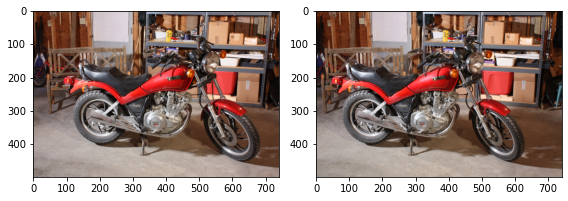

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

images = data.stereo_motorcycle()
ax[0].imshow(images[0])
ax[1].imshow(images[1])

fig.tight_layout()
plt.show()

In [4]:
import os
os.getcwd()

'C:\\Users\\Meehir\\Documents\\GitHub\\project-5'

In [5]:
import cv2

In [6]:
img = cv2.imread('images/3.jpg')
img = cv2.resize(img, (250,250))

In [7]:
from colormath.color_objects import sRGBColor, LabColor
from colormath.color_conversions import convert_color
from colormath.color_diff import delta_e_cie2000

# Red Color
color1_rgb = sRGBColor(1.0, 0.0, 0.0);

# Blue Color
color2_rgb = sRGBColor(0.0, 0.0, 1.0);

# Convert from RGB to Lab Color Space
color1_lab = convert_color(color1_rgb, LabColor);

# Convert from RGB to Lab Color Space
color2_lab = convert_color(color2_rgb, LabColor);

# Find the color difference
delta_e = delta_e_cie2000(color1_lab, color2_lab);

print ("The difference between the 2 color = ", delta_e)


The difference between the 2 color =  52.88009898346556


In [8]:
print(datetime.now())

2020-11-21 19:27:46.053200


In [9]:
from get_dominant_color import get_dominant_color

In [10]:
from datetime import datetime 

def get_dominant_color(pil_img, palette_size=20):
    start = datetime.now()
    # Resize image to speed up processing
    img = pil_img.copy()
 
    # Reduce colors (uses k-means internally)
    paletted = img.convert('P', palette=Image.ADAPTIVE, colors=palette_size)

    # Find the color that occurs most often
    palette = paletted.getpalette()
    color_counts = sorted(paletted.getcolors(), reverse=True)
    palette_index = color_counts[0][1]
    dominant_color = palette[palette_index*3:palette_index*3+3]
    print("Elapsed time:{}".format(datetime.now() - start))
    return dominant_color

In [11]:
from PIL import Image

In [12]:
img = Image.open('images/2.jpg')

In [13]:
color_dict = {
                'sky blue': (113, 213, 248),
                'ultramarine': (60, 124, 246),
                'medium blue': (15, 72, 175),
                'dark blue': (25, 42, 114),
                'violet': (33, 19, 70),
                'teal': (14, 67, 73),
                'green': (15, 66, 35),
                'leaf green': (88, 135, 31),
                'light green': (154, 193, 45),
                'yellow': (255, 252, 35),
                'orange ': (230, 156, 23),
                'dark orange': (235, 105, 21),
                'vermillion': (216, 68, 14),
                'red': (205, 19, 14),
                'fuchsia': (157, 52, 105),
                'purple': (107, 32, 86),
                'dark purple': (84, 20, 57),
                'dark grey': (110, 110, 110),
                'light grey': (220, 220, 220),
                'pale grey': (240, 240, 240)
                }

In [14]:
import json

In [15]:
#with open("color_palette.json", "w") as outfile: 
    #json.dump(color_dict, outfile) 

In [16]:
from colormath.color_objects import sRGBColor, LabColor
from colormath.color_conversions import convert_color
from colormath.color_diff import delta_e_cie2000

def color_distance(color_1, color_2):
    r1, g1, b1 = color_1[0], color_1[1], color_1[2]
    color1_rgb = sRGBColor(r1, g1, b1)

    r2, g2, b2 = color_2[0], color_2[1], color_2[2]
    color2_rgb = sRGBColor(r2, g2, b2)


    # Convert from RGB to Lab Color Space
    color1_lab = convert_color(color1_rgb, LabColor)

    # Convert from RGB to Lab Color Space
    color2_lab = convert_color(color2_rgb, LabColor)

    # Find the color difference
    delta_e = delta_e_cie2000(color1_lab, color2_lab)

    return delta_e

In [17]:
from image_functions import get_dominant_color

In [18]:
c = get_dominant_color(img, comp_time=True)

Elapsed time:0:00:02.891140


In [19]:
type(color_dict)

dict

In [20]:
from image_functions import closest_on_palette
closest_on_palette(c, color_dict)

'dark grey'

In [22]:
from colorthief import ColorThief

In [23]:
closest_col = []
palettes = []
for i in range(1, 7):
    start = datetime.now()
    color_thief = ColorThief('images/{}.jpg'.format(i))
    dominant_color = color_thief.get_color(quality=1)
    print(dominant_color)
    palettes.append(color_thief.get_palette(color_count=4, quality=1))
    print(i, datetime.now() - start, closest_on_palette(dominant_color, color_dict))

(142, 143, 121)
1 0:03:55.847795 leaf green
(99, 91, 84)
2 0:01:47.519579 dark grey
(109, 105, 91)
3 0:03:46.408008 leaf green
(69, 79, 64)
4 0:04:00.165899 green
(44, 43, 50)
5 0:01:39.404123 dark blue
(218, 214, 208)
6 0:00:52.653508 light grey


In [27]:
import numpy as np

In [28]:
arr = np.array(palettes)

In [34]:
arr.reshape(24, 3)

array([[143, 143, 121],
       [ 54,  81,  66],
       [180, 182, 188],
       [ 84,  64,  54],
       [ 94,  86,  79],
       [207, 141,  89],
       [156, 151, 196],
       [171, 180, 138],
       [106, 102,  89],
       [195, 168, 133],
       [150, 157, 175],
       [171, 173, 142],
       [ 76,  85,  70],
       [180, 162, 149],
       [153, 173, 156],
       [148, 158, 165],
       [ 60,  57,  62],
       [212, 207, 208],
       [161, 158, 160],
       [158, 146, 165],
       [212, 208, 202],
       [ 75,  63,  53],
       [112,  95,  84],
       [124, 110,  97]])